In [ ]:
# pip install --upgrade tensorflow

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import MeanSquaredError,MeanAbsoluteError,Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError,Accuracy
from tensorflow.keras import regularizers


In [ ]:
data = pd.read_csv('./Updated_data_car_price_prediction.csv')
data


,Unnamed: 0,car_prices_in_lakhs,car_company,kms_driven,fuel_type,transmission,ownership,manufacture_year,engine_in_cc,seats
0,0,10.03,Jeep,86226.0,Diesel,Manual,1,2017,1956.0,5
1,1,12.83,Renault,13248.0,Petrol,Automatic,1,2021,1330.0,5
2,2,16.40,Toyota,60343.0,Petrol,Automatic,1,2016,2494.0,5
3,3,7.77,Honda,26696.0,Petrol,Automatic,1,2018,1199.0,5
4,4,5.15,Volkswagen,69414.0,Petrol,Manual,1,2016,1199.0,5
...,...,...,...,...,...,...,...,...,...,...
5507,5507,28.90,BMW,45000.0,Diesel,Automatic,1,2018,2995.0,7
5508,5508,64.90,BMW,29000.0,Petrol,Automatic,2,2015,1968.0,5
5509,5509,13.75,Jaguar,90000.0,Diesel,Automatic,2,2013,2755.0,5
5510,5510,29.90,BMW,79000.0,Diesel,Automatic,3,2015,2967.0,6


In [ ]:
data = data.iloc[:,1:]

In [ ]:
data

,car_prices_in_lakhs,car_company,kms_driven,fuel_type,transmission,ownership,manufacture_year,engine_in_cc,seats
0,10.03,Jeep,86226.0,Diesel,Manual,1,2017,1956.0,5
1,12.83,Renault,13248.0,Petrol,Automatic,1,2021,1330.0,5
2,16.40,Toyota,60343.0,Petrol,Automatic,1,2016,2494.0,5
3,7.77,Honda,26696.0,Petrol,Automatic,1,2018,1199.0,5
4,5.15,Volkswagen,69414.0,Petrol,Manual,1,2016,1199.0,5
...,...,...,...,...,...,...,...,...,...
5507,28.90,BMW,45000.0,Diesel,Automatic,1,2018,2995.0,7
5508,64.90,BMW,29000.0,Petrol,Automatic,2,2015,1968.0,5
5509,13.75,Jaguar,90000.0,Diesel,Automatic,2,2013,2755.0,5
5510,29.90,BMW,79000.0,Diesel,Automatic,3,2015,2967.0,6


In [ ]:
data.iloc[:,[1,3,4]] = data.iloc[:,[1,3,4]].apply(LabelEncoder().fit_transform)

In [ ]:
print("\n",pd.unique(data['car_company']))
print("\n",pd.unique(data['car_prices_in_lakhs']))
print("\n",pd.unique(data['kms_driven']))
print("\n",pd.unique(data['fuel_type']))
print("\n",pd.unique(data['transmission']))
print("\n",pd.unique(data['ownership']))
print("\n",pd.unique(data['manufacture_year']))
print("\n",pd.unique(data['engine_in_cc']))
print("\n",pd.unique(data['seats']))


 [12 26 29 8 30 18 17 9 23 13 16 28 1 20 4 31 0 24 7 3 27 15 14 21 11 22 6
 25 5 19 2 10]

 [10.03 12.83 16.4  ... 28.9  64.9  31.9 ]

 [ 86226.  13248.  60343. ... 154000.  79718.  85002.]

 [1 4 0 2 3]

 [1 0]

 [1 2 3 4 5]

 [2017 2021 2016 2018 2015 2014 2020 2019 2012 2008 2013 2022 2010 2005
 2009 2006 2011 2007 2002 2004 1998 2003 1995 2000 2001 1999]

 [1956. 1330. 2494. 1199. 1197. 1498. 1497. 1368. 1396. 1373. 1198. 1462.
  799.  998. 1591. 1999.  999.  814.  796. 1353. 1451. 1995. 1991. 2179.
 1798. 1985. 1968. 2993. 4134. 1598.  936. 1248. 2143. 1086. 1998. 2198.
 2499. 1496. 1186. 1582. 1984. 1997. 1969. 1493. 2755. 1196. 2953. 2184.
 1461. 2987. 1950. 1395. 2523. 1193. 1061. 1298. 1586.  993. 2354. 1405.
 2967.    0. 2694. 2696. 2609. 2998. 2477. 2393. 2982. 2199. 1799. 3198.
 1194. 2997. 1495. 1794. 2498. 1364. 1388. 2596. 1173. 1797. 1499. 1399.
 4461. 2400. 1896. 1796. 3956.  995. 2995. 2487.  624. 1993. 2925. 1599.
 1299. 1120. 2489. 5461. 3996. 1595. 4367. 1996. 595

In [ ]:
data

,car_prices_in_lakhs,car_company,kms_driven,fuel_type,transmission,ownership,manufacture_year,engine_in_cc,seats
0,10.03,12,86226.0,1,1,1,2017,1956.0,5
1,12.83,26,13248.0,4,0,1,2021,1330.0,5
2,16.40,29,60343.0,4,0,1,2016,2494.0,5
3,7.77,8,26696.0,4,0,1,2018,1199.0,5
4,5.15,30,69414.0,4,1,1,2016,1199.0,5
...,...,...,...,...,...,...,...,...,...
5507,28.90,1,45000.0,1,0,1,2018,2995.0,7
5508,64.90,1,29000.0,4,0,2,2015,1968.0,5
5509,13.75,11,90000.0,1,0,2,2013,2755.0,5
5510,29.90,1,79000.0,1,0,3,2015,2967.0,6


In [ ]:
def r(x):
  return round(x)

In [ ]:
tensor_data = tf.constant(data,dtype=tf.float32)
tensor_data

<tf.Tensor: shape=(5512, 9), dtype=float32, numpy=
array([[1.0030e+01, 1.2000e+01, 8.6226e+04, ..., 2.0170e+03, 1.9560e+03,
        5.0000e+00],
       [1.2830e+01, 2.6000e+01, 1.3248e+04, ..., 2.0210e+03, 1.3300e+03,
        5.0000e+00],
       [1.6400e+01, 2.9000e+01, 6.0343e+04, ..., 2.0160e+03, 2.4940e+03,
        5.0000e+00],
       ...,
       [1.3750e+01, 1.1000e+01, 9.0000e+04, ..., 2.0130e+03, 2.7550e+03,
        5.0000e+00],
       [2.9900e+01, 1.0000e+00, 7.9000e+04, ..., 2.0150e+03, 2.9670e+03,
        6.0000e+00],
       [3.1900e+01, 1.0000e+00, 4.2000e+04, ..., 2.0170e+03, 1.9910e+03,
        5.0000e+00]], dtype=float32)>

In [ ]:
t = pd.DataFrame(tensor_data)
t

,0,1,2,3,4,5,6,7,8
0,10.030000,12.0,86226.0,1.0,1.0,1.0,2017.0,1956.0,5.0
1,12.830000,26.0,13248.0,4.0,0.0,1.0,2021.0,1330.0,5.0
2,16.400000,29.0,60343.0,4.0,0.0,1.0,2016.0,2494.0,5.0
3,7.770000,8.0,26696.0,4.0,0.0,1.0,2018.0,1199.0,5.0
4,5.150000,30.0,69414.0,4.0,1.0,1.0,2016.0,1199.0,5.0
...,...,...,...,...,...,...,...,...,...
5507,28.900000,1.0,45000.0,1.0,0.0,1.0,2018.0,2995.0,7.0
5508,64.900002,1.0,29000.0,4.0,0.0,2.0,2015.0,1968.0,5.0
5509,13.750000,11.0,90000.0,1.0,0.0,2.0,2013.0,2755.0,5.0
5510,29.900000,1.0,79000.0,1.0,0.0,3.0,2015.0,2967.0,6.0


In [ ]:
tensor_data = tf.random.shuffle(tensor_data)
tensor_data

<tf.Tensor: shape=(5512, 9), dtype=float32, numpy=
array([[5.55000e+00, 1.80000e+01, 1.14892e+05, ..., 2.01500e+03,
        2.14300e+03, 5.00000e+00],
       [1.05500e+01, 2.90000e+01, 9.99340e+04, ..., 2.01200e+03,
        1.19700e+03, 5.00000e+00],
       [6.25000e+00, 9.00000e+00, 4.80000e+04, ..., 2.01800e+03,
        1.19700e+03, 5.00000e+00],
       ...,
       [1.11000e+00, 1.80000e+01, 7.34110e+04, ..., 2.01100e+03,
        1.19900e+03, 5.00000e+00],
       [1.67800e+01, 1.20000e+01, 3.23780e+04, ..., 2.01900e+03,
        1.36800e+03, 5.00000e+00],
       [4.00000e+00, 2.30000e+01, 9.05920e+04, ..., 2.01300e+03,
        1.99500e+03, 5.00000e+00]], dtype=float32)>

In [ ]:
X = tensor_data[:,1:]
X

<tf.Tensor: shape=(5512, 8), dtype=float32, numpy=
array([[1.80000e+01, 1.14892e+05, 1.00000e+00, ..., 2.01500e+03,
        2.14300e+03, 5.00000e+00],
       [2.90000e+01, 9.99340e+04, 1.00000e+00, ..., 2.01200e+03,
        1.19700e+03, 5.00000e+00],
       [9.00000e+00, 4.80000e+04, 4.00000e+00, ..., 2.01800e+03,
        1.19700e+03, 5.00000e+00],
       ...,
       [1.80000e+01, 7.34110e+04, 4.00000e+00, ..., 2.01100e+03,
        1.19900e+03, 5.00000e+00],
       [1.20000e+01, 3.23780e+04, 4.00000e+00, ..., 2.01900e+03,
        1.36800e+03, 5.00000e+00],
       [2.30000e+01, 9.05920e+04, 4.00000e+00, ..., 2.01300e+03,
        1.99500e+03, 5.00000e+00]], dtype=float32)>

In [ ]:
y = tensor_data[:,0]
y = tf.expand_dims(y,axis=-1)
y

<tf.Tensor: shape=(5512, 1), dtype=float32, numpy=
array([[ 5.55],
       [10.55],
       [ 6.25],
       ...,
       [ 1.11],
       [16.78],
       [ 4.  ]], dtype=float32)>

In [ ]:
normalizer = Normalization()

In [ ]:
normalizer.adapt(X)

In [ ]:
normalizer(X[:5])

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.31213778,  1.2351744 , -1.068243  ,  0.6254731 ,  0.82257783,
        -0.1159905 ,  1.0544618 , -0.34822553],
       [ 1.6651217 ,  0.8776725 , -1.068243  ,  0.6254731 , -0.6032236 ,
        -0.87981224, -0.578943  , -0.34822553],
       [-0.794849  , -0.36357003,  0.9185376 ,  0.6254731 , -0.6032236 ,
         0.6478312 , -0.578943  , -0.34822553],
       [-1.040846  , -0.9132789 , -1.068243  , -1.5987898 , -0.6032236 ,
        -1.1344194 ,  1.1166209 ,  2.4295151 ],
       [-1.7788372 ,  0.5207442 , -1.068243  , -1.5987898 ,  0.82257783,
        -0.1159905 ,  0.8023718 , -0.34822553]], dtype=float32)>

In [ ]:
X[:5]

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[1.80000e+01, 1.14892e+05, 1.00000e+00, 1.00000e+00, 2.00000e+00,
        2.01500e+03, 2.14300e+03, 5.00000e+00],
       [2.90000e+01, 9.99340e+04, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        2.01200e+03, 1.19700e+03, 5.00000e+00],
       [9.00000e+00, 4.80000e+04, 4.00000e+00, 1.00000e+00, 1.00000e+00,
        2.01800e+03, 1.19700e+03, 5.00000e+00],
       [7.00000e+00, 2.50000e+04, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        2.01100e+03, 2.17900e+03, 7.00000e+00],
       [1.00000e+00, 8.50000e+04, 1.00000e+00, 0.00000e+00, 2.00000e+00,
        2.01500e+03, 1.99700e+03, 5.00000e+00]], dtype=float32)>

In [ ]:
Train_ratio = 0.7
Test_ratio = 0.3
data_len = len(data)

In [ ]:
X_train = X[:int(data_len*Train_ratio)]
y_train = y[:int(data_len*Train_ratio)]
print(X_train.shape)
print(y_train.shape)

(3858, 8)
(3858, 1)


In [ ]:
X_test = X[int(data_len*(Train_ratio)):]
y_test = y[int(data_len*(Train_ratio)):]
print(X_test.shape)
print(y_test.shape)

(1654, 8)
(1654, 1)


In [ ]:
model = RandomForestRegressor(n_estimators=-1)
# rmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **

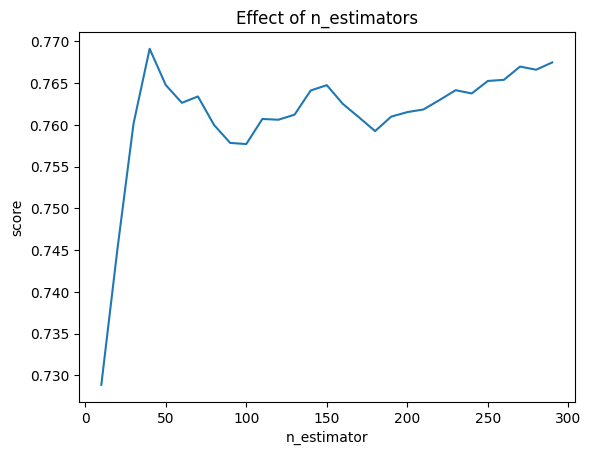

In [ ]:
estimators = np.arange(10, 300, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n,random_state=42,oob_score=True)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [ ]:
estimators[scores.index(np.max(scores))]

40

In [ ]:
rmodel = RandomForestRegressor(n_estimators=40,random_state=42, oob_score=True)
rmodel.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=40, oob_score=True, random_state=42)

In [ ]:
y_pred = rmodel.predict(X_test)

In [ ]:
y_pred

array([42.6820001 ,  7.66174999, 65.06374998, ...,  2.17875002,
       18.52599986, 11.07775003])

In [ ]:
model.add(InputLayer(shape=(8,)))
model.add(normalizer)
model.add(Dense(128,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(Dense(128,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(Dense(128,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(Dense(64,kernel_regularizer=regularizers.l2(0.01),activation='relu'))
model.add(Dense(1))

In [ ]:
model = Sequential()

In [ ]:
# X.shape,y.shape

In [ ]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 128)                 │           1,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,514 (166.07 KB)

 Trainable params: 42,497 (166.00 KB)

 Non-trainable params: 17 (72.00 B)

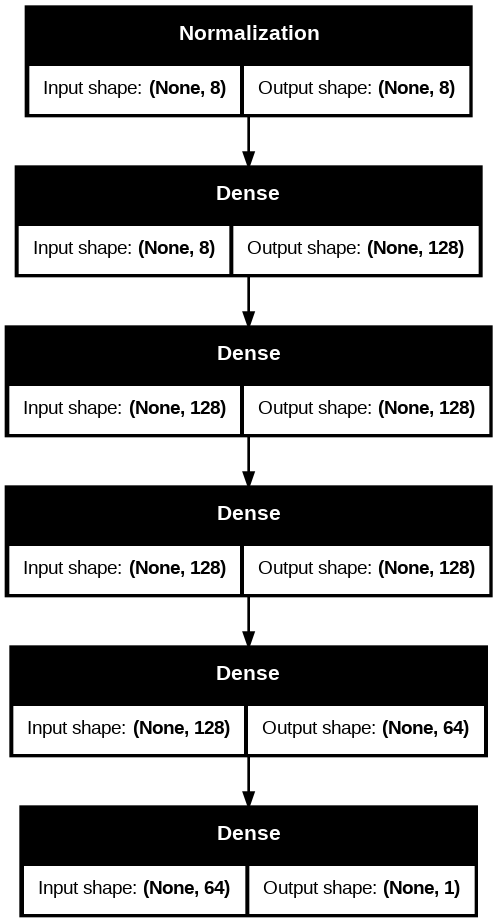

In [ ]:
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True,dpi=96)

In [ ]:
Train_ratio = 0.7
Validation_ratio = 0.2
Test_ratio = 0.1
data_len = len(data)

In [ ]:
X_train = X[:int(data_len*Train_ratio)]
y_train = y[:int(data_len*Train_ratio)]
print(X_train.shape)
print(y_train.shape)

(3858, 8)
(3858, 1)


In [ ]:
X_val = X[int(data_len*Train_ratio):int(data_len*(Validation_ratio+Train_ratio))]
y_val = y[int(data_len*Train_ratio):int(data_len*(Validation_ratio+Train_ratio))]
print(X_val.shape)
print(y_val.shape)

(1102, 8)
(1102, 1)


In [ ]:
X_test = X[int(data_len*(Validation_ratio+Train_ratio)):]
y_test = y[int(data_len*(Validation_ratio+Train_ratio)):]
print(X_test.shape)
print(y_test.shape)

(552, 8)
(552, 1)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=MeanAbsoluteError(),
              metrics=[RootMeanSquaredError()])

In [ ]:
model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=100,verbose=1)

Epoch 1/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 11.4751 - root_mean_squared_error: 20.9882 - val_loss: 7.0889 - val_root_mean_squared_error: 15.3551
Epoch 2/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 6.6503 - root_mean_squared_error: 14.2051 - val_loss: 6.5507 - val_root_mean_squared_error: 15.8064
Epoch 3/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.7825 - root_mean_squared_error: 16.6279 - val_loss: 6.2195 - val_root_mean_squared_error: 14.9032
Epoch 4/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6.5675 - root_mean_squared_error: 15.9066 - val_loss: 6.0947 - val_root_mean_squared_error: 15.0495
Epoch 5/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6.7617 - root_mean_squared_error: 18.1680 - val_loss: 5.9950 - val_root_mean_squared_error: 14.8147
Epoch 6/100
121/121 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.1852 - root_mean_squared_error: 16.5283 - val_loss: 5.9072 - val_root_mean_squared_error: 15.1941
Epoch 7/100
121/121 ━━━━━━━━━━━━

In [ ]:
history = model.history.history

In [ ]:
history

Text(0, 0.5, 'Loss')

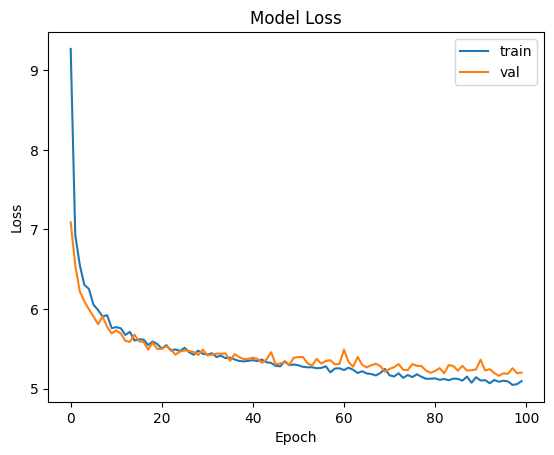

In [ ]:
# plt.subplot(121)
plt.plot(history['loss'])
plt.plot(history['val_loss'])
plt.legend(['train','val'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.yscale('log')
# plt.subplot(122)


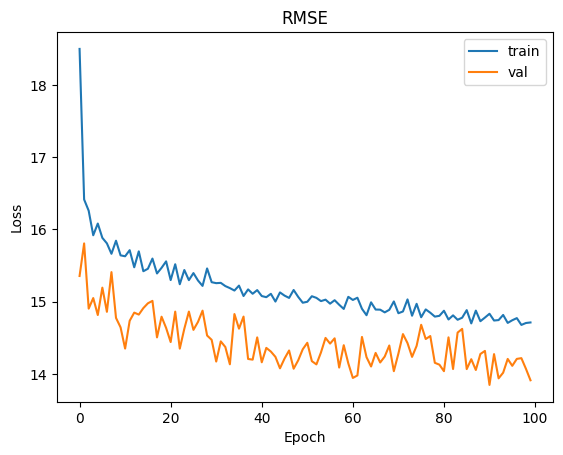

In [ ]:
plt.plot(history['root_mean_squared_error'])
plt.plot(history['val_root_mean_squared_error'])
plt.legend(['train','val'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
# plt.yscale('log')
plt.title('RMSE')
plt.show()

In [ ]:
model.evaluate(x=X_test,y=y_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 4.6588 - root_mean_squared_error: 9.8747


[5.037662029266357, 12.040318489074707]

In [ ]:
model.predict(tf.expand_dims(X_test[87],axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step


array([[9.567583]], dtype=float32)

In [ ]:
y_test[87]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([15.02], dtype=float32)>

In [ ]:
y_pred = model.predict(X_test)[:,0]
y_pred.shape


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


(552,)

In [ ]:
print(y_pred.shape)
type(y_pred)

(1654,)


numpy.ndarray

In [ ]:
y_test.shape

TensorShape([1654, 1])

In [ ]:
y_true = y_test[:,0]
print(y_true.shape)
y_true = np.array(y_true)

(1654,)


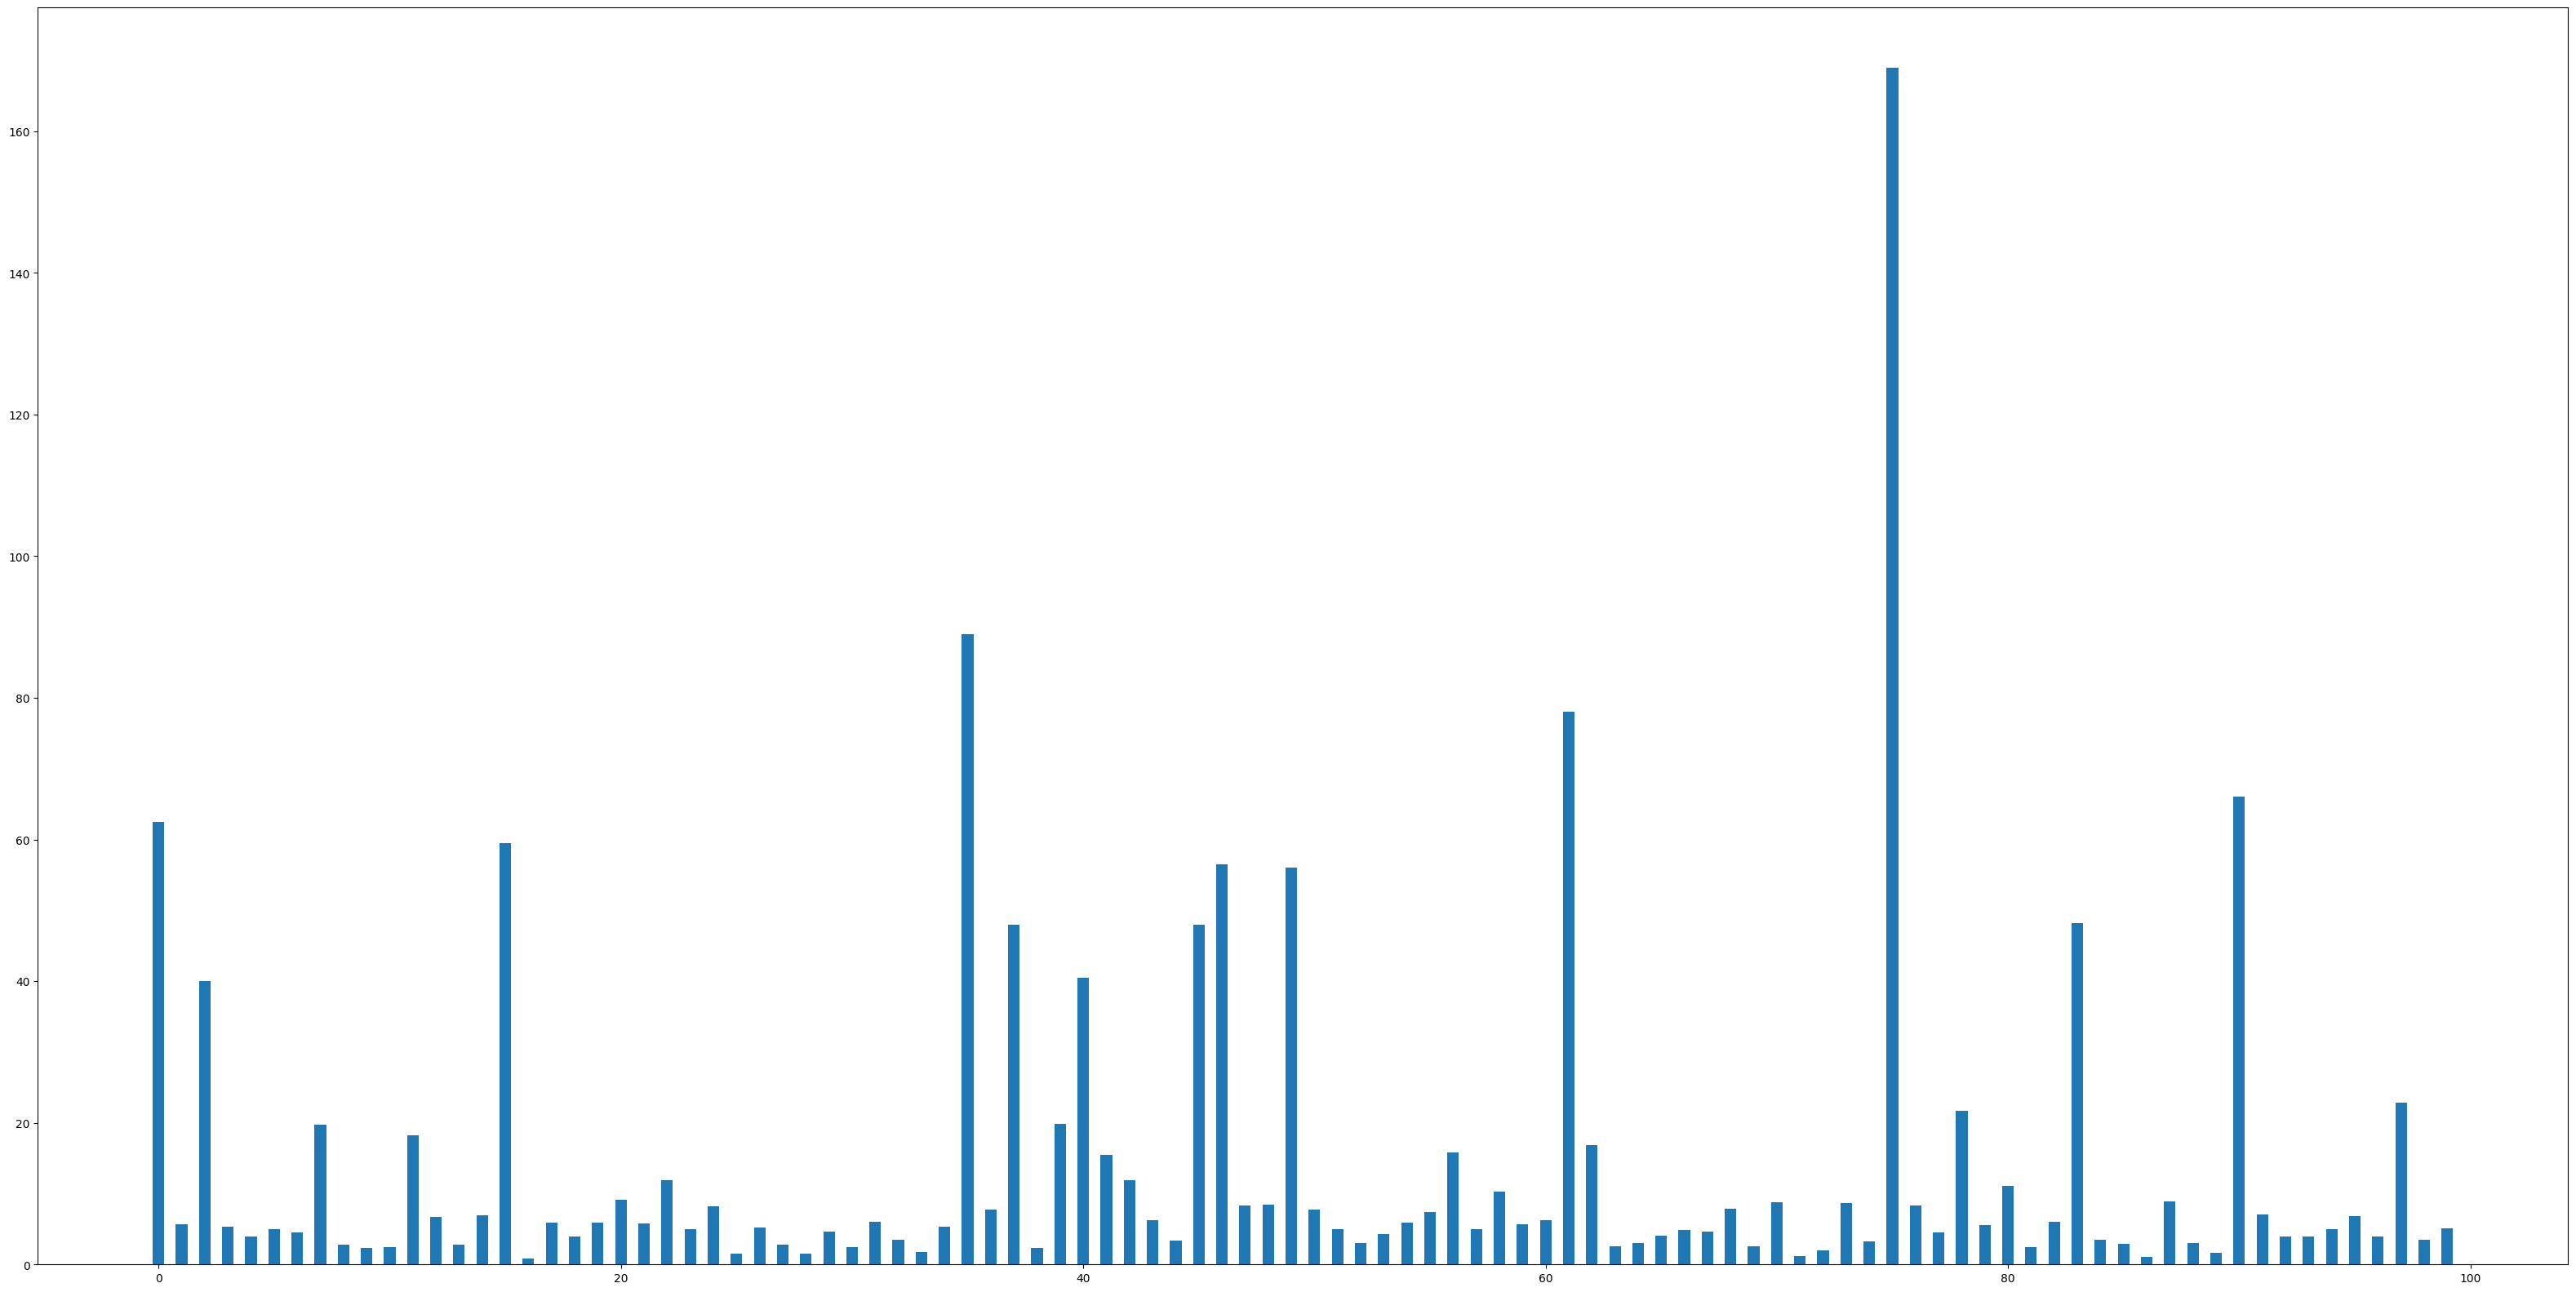

In [ ]:
ind = np.arange(100)
plt.figure(figsize=(40,20))
plt.bar(ind,y_true[:100],width=0.5,label='True')
plt.show()

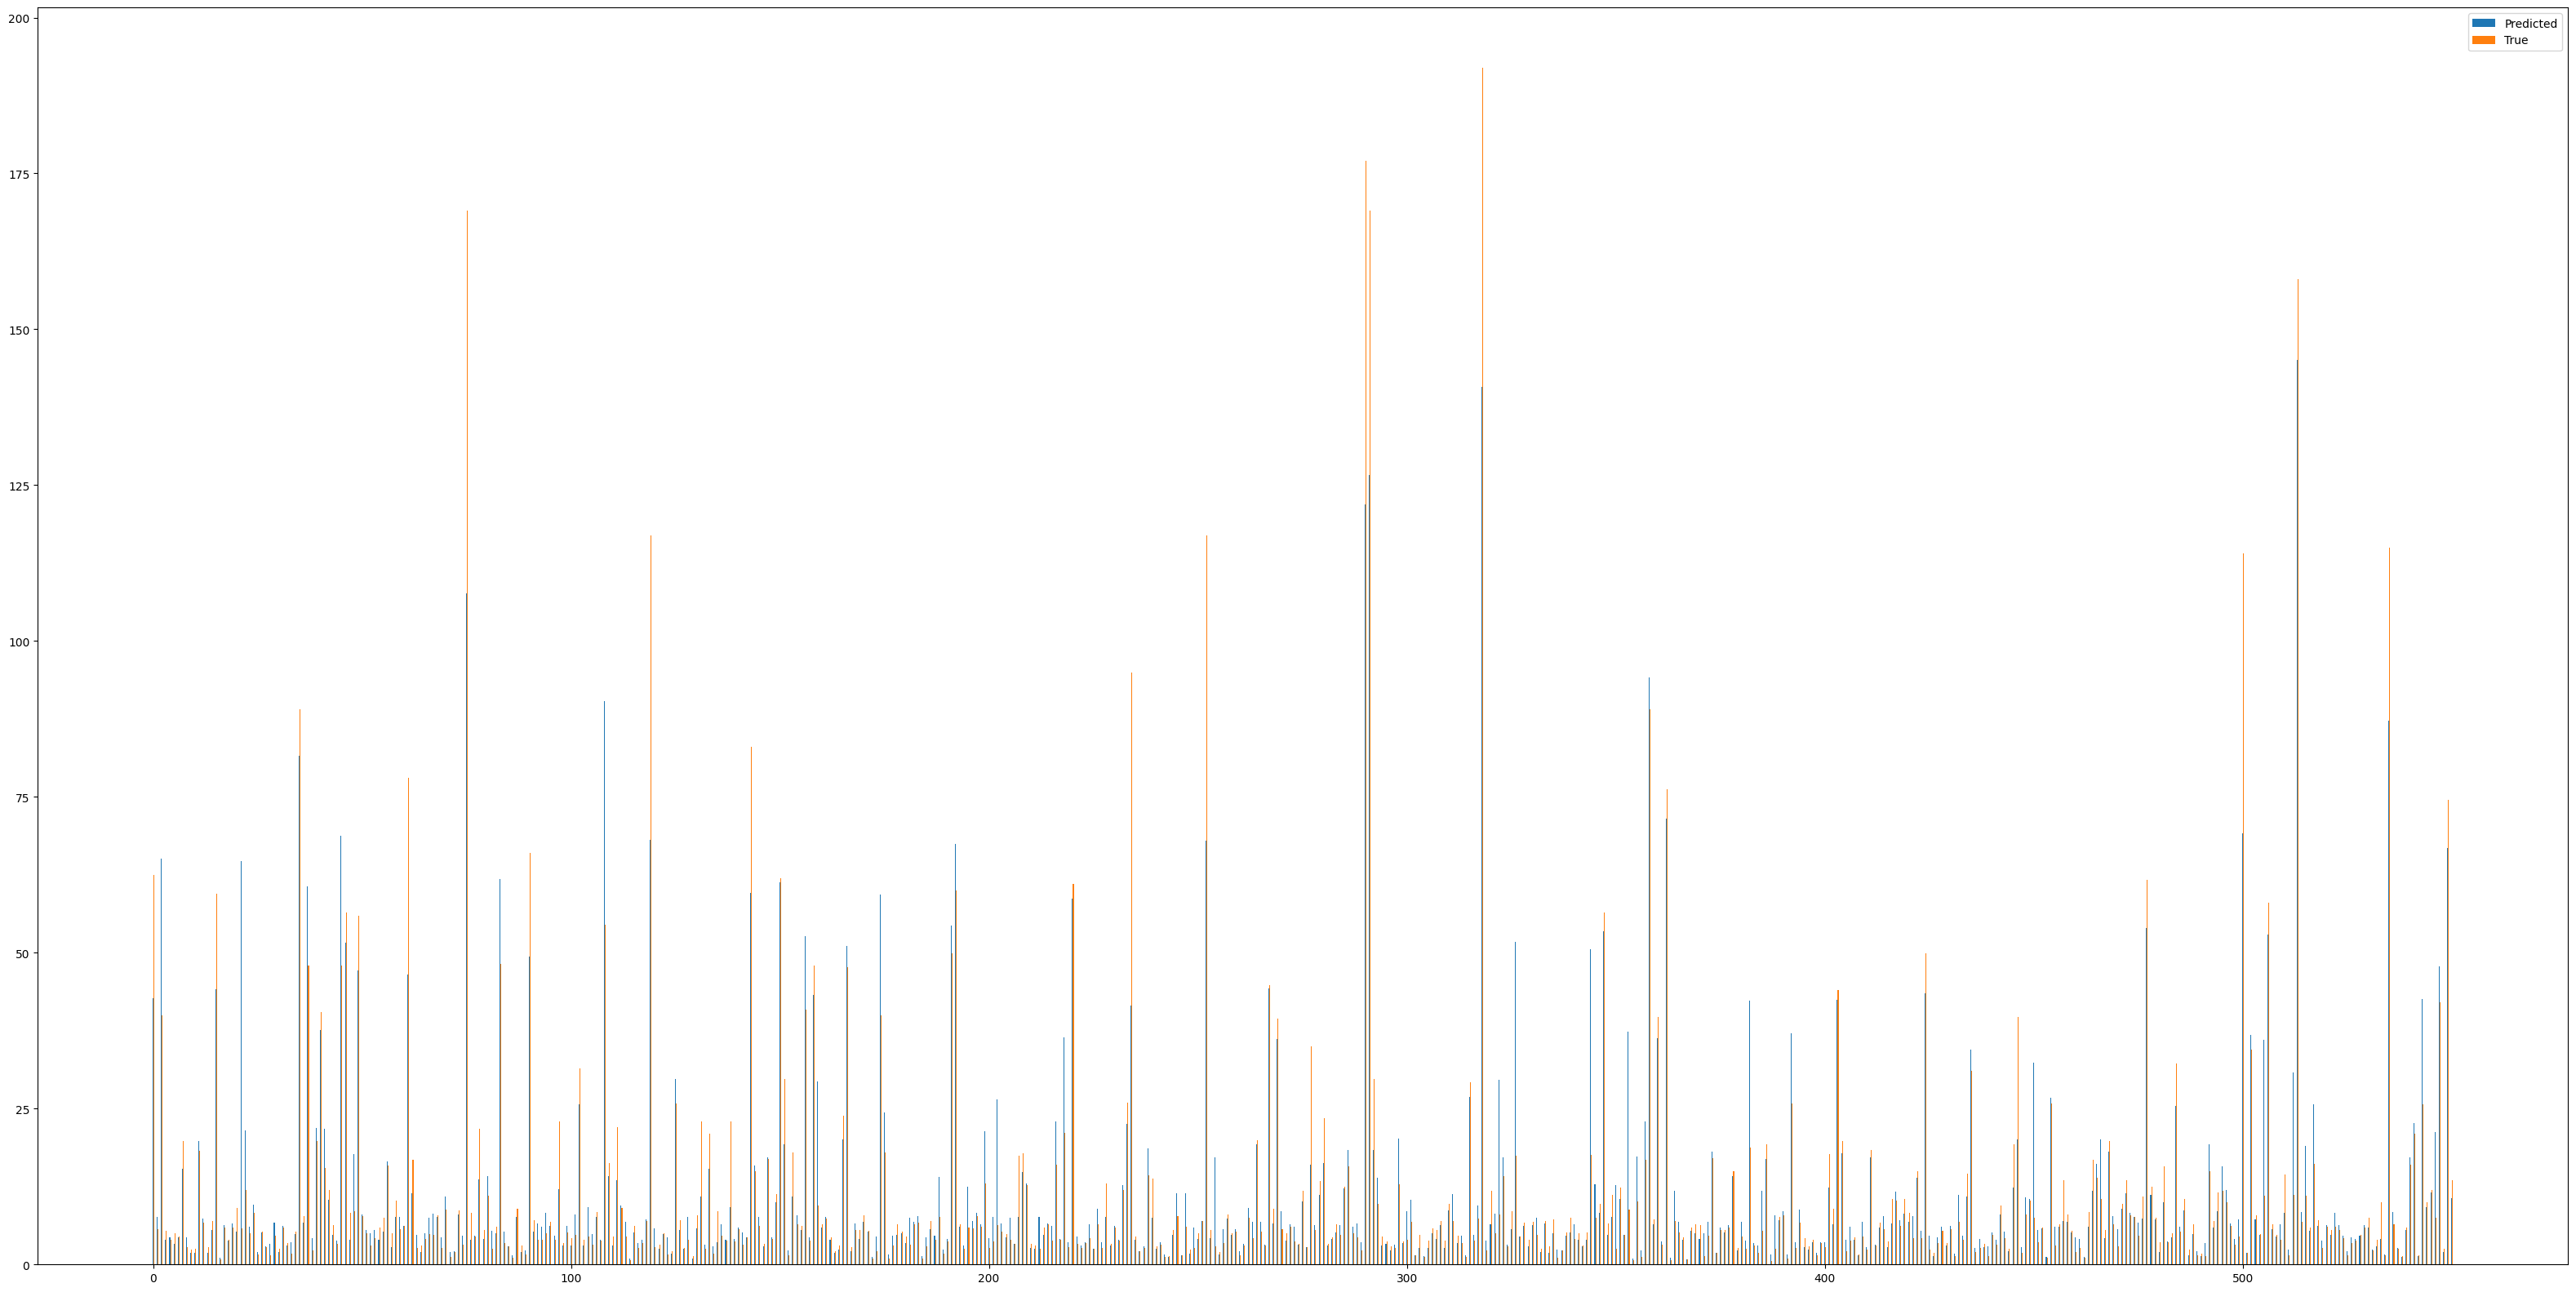

In [ ]:
ind = np.arange(551)
plt.figure(figsize=(40,20))

width = 0.2

# plt.bar(ind,y_pred[:100],width,label='Predicted')
# plt.bar(ind+width,y_true[:100],width,label='True')
                                                            # Both are valid.
plt.bar(ind,y_pred[ind],width,label='Predicted')
plt.bar(ind+width,y_true[ind],width,label='True')


plt.legend()
plt.show()